<a href="https://colab.research.google.com/github/amrilhakimsihotang/Machine_Learning_TensorFlow/blob/Project_Membuat_Model_NLP_dgn_TensorFlow/Project_Membuat_Model_NLP_dgn_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama:Amril Hakim Sihotang <br>
Project : Membuat Model NLP dengan TensorFlow

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
files.upload();


Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                           Vehicle Sales Data                                  19MB  2024-02-21 20:16:17           5007         85  1.0              
devi5723/e-commerce-cosmetics-dataset                        E-commerce Cosmetic Products                         1MB  2024-02-28 14:46:12            657         24  0.9411765        
sazidthe1/world-gdp-growth                                   World GDP Growth                                    14KB  2024-02-25 11:37:58            785         22  1.0              
tarunrm09/climate-change-indicators                          Climate change Indi

In [ ]:
!kaggle datasets download -d crxxom/daily-google-news
!unzip /content/daily-google-news.zip -d /content/files

 94% 23.0M/24.5M [00:01<00:00, 21.0MB/s]
100% 24.5M/24.5M [00:01<00:00, 16.2MB/s]
Archive:  /content/daily-google-news.zip
  inflating: /content/files/2023_10.csv  
  inflating: /content/files/2023_11.csv  
  inflating: /content/files/2023_12.csv  
  inflating: /content/files/2023_9.csv  
  inflating: /content/files/2024_1.csv  
  inflating: /content/files/2024_2.csv  


In [ ]:
import pandas as pd

df_limit = pd.read_csv('/content/files/2023_11.csv')
df_limit.dropna()
df_limit = df_limit.drop_duplicates()
df_limit = df_limit.drop(['Publisher','Link', 'DateTime'], axis=1)
df = df_limit.iloc[:15000]
df


,Title,Category
0,Pumpkin Spice Profits: Take a Sip of SBUX Stoc...,Business
1,There's been a lot of success for labor moveme...,Business
2,Eaton: Q3 Earnings Snapshot,Business
3,US stepping up regulation of artificial intell...,Business
4,Will Strong Server and Storage Aid SMCI's Q1 E...,Business
...,...,...
15635,Here are the six finalists for a new Minnesota...,Headlines
15636,Binance Founder Changpeng Zhao Pleads Guilty t...,Headlines
15637,BREAKING: Hostage deal approved by Israeli gov...,Headlines
15638,They're here! See final 6 design candidates fo...,Headlines


In [ ]:
pip install nltk

In [ ]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 4.8 MB/s eta 0:00:00


In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 44.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
pip install langid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941172 sha256=8c833320fb5b44eb78f48e00d5c2e07bddb388b3b59a1fc7b637c254f7621c7a
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid


In [ ]:
#Library yang dibutuhkan
import nltk
import re
import spacy
import emoji
import langid
from spacy.lang.en import STOP_WORDS
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

In [ ]:
#preprocessing data

nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')
nltk_stopwords = set(stopwords.words('english'))

custom_common_words = ['nyse','israel','paycom','facebook','instagram','twitter','video','pretty','great','open','fine','list','cool','like',
                       'dislike','offshore','luman','lumn', 'buildout','thike','postive', 'nderi','islamphobia',
                       'lovee','publis','blow','growth','membksankan', 'bhale','bugss', 'today','mathana','instagramm','ossum','stock','find','bank','surv','offer','recall','auto','futures',
                       'crypto',''
                       'starrrrrrrrrr','fromm','pypl','rate','unchanged','lumen','yesterday','roku','coworke','blow','aapl','month','qcom','past','rally','year','toyota','apple','cvna',
                       'time','chicago','lilly','unifor','holding','hold','bkng','starbuck']

def is_english_word(word):
    return langid.classify(word)[0] == 'en'


def keep_clean_text_only(text):
    emoji_pattern = re.compile("[...]+", flags=re.UNICODE)
    text_without_emoji = emoji_pattern.sub(r'', text)
    cleaned_text = re.sub(r'[^a-zA-Z\s]', ' ', text_without_emoji)
    cleaned_text = cleaned_text.lower()
    doc = nlp(cleaned_text)
    words = [token.lemma_ for token in doc]
    words = [word for word in words if word not in STOP_WORDS and word.isalpha() and len(word) > 3]
    words = [word for word in words if word not in nltk_stopwords]
    words = [word for word in words if word not in custom_common_words]
    words = [word for word in words if is_english_word(word)]
    cleaned_text = ' '.join(words)

    return cleaned_text

df['Title'] = df['Title'].apply(keep_clean_text_only)

df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-12-61402c9ceae7>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].apply(keep_clean_text_only)


,Title,Category
0,pumpkin spice profit,Business
1,success labor movement white house seth harris,Business
2,eaton earning snapshot,Business
3,step regulation,Business
4,strong server storage smci earning,Business
...,...,...
15635,finalist state flag,Headlines
15636,binance founder changpeng plead guilty money v...,Headlines
15637,break hostage deal approve israeli government,Headlines
15638,final design candidate state flag,Headlines


In [ ]:
category = pd.get_dummies(df.Category)
new_df_top_classes = pd.concat([df,category],axis=1)
new_df_top_classes = new_df_top_classes.drop(columns=['Category'])
new_df_top_classes

,Title,Business,Entertainment,Headlines
0,pumpkin spice profit,1,0,0
1,success labor movement white house seth harris,1,0,0
2,eaton earning snapshot,1,0,0
3,step regulation,1,0,0
4,strong server storage smci earning,1,0,0
...,...,...,...,...
15635,finalist state flag,0,0,1
15636,binance founder changpeng plead guilty money v...,0,0,1
15637,break hostage deal approve israeli government,0,0,1
15638,final design candidate state flag,0,0,1


In [ ]:
category = new_df_top_classes['Title'].values
label_columns = new_df_top_classes[['Business','Entertainment','Headlines']].values

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.91 and logs.get('val_accuracy') > 0.91):
      print("\nAkurasi pada train dan validation set telah mencapai > 90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
category_train, category_test, label_train, labels_test = train_test_split(category, label_columns, test_size=0.2)

total_word =5000
max_len= 32


tokenizer = Tokenizer(num_words=total_word, oov_token='<oov>')


tokenizer.fit_on_texts(category_train)
tokenizer.fit_on_texts(category_test)

train_sequences = tokenizer.texts_to_sequences(category_train)
test_sequences = tokenizer.texts_to_sequences(category_test)

padded_train = pad_sequences(train_sequences,maxlen=max_len,truncating='post')
padded_test = pad_sequences(test_sequences,maxlen=max_len,truncating='post')

outputs_dim = 64
dropout_rate = 0.5
lstm_units = 64
learning_rate = 0.001

model = tf.keras.Sequential([
    Embedding(input_dim=total_word, output_dim=outputs_dim, input_length=max_len),
    Bidirectional(LSTM(lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.1),
    Dense(3, activation='softmax')
])

optimizer = Adam(learning_rate=learning_rate)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 20


history = model.fit(padded_train, label_train, batch_size=32, epochs=num_epochs,validation_data=(padded_test, labels_test),callbacks=[callbacks], verbose=2)


Epoch 1/20
375/375 - 64s - loss: 0.8763 - accuracy: 0.5396 - val_loss: 0.5199 - val_accuracy: 0.8117 - 64s/epoch - 171ms/step
Epoch 2/20
375/375 - 47s - loss: 0.4531 - accuracy: 0.8430 - val_loss: 0.3206 - val_accuracy: 0.8907 - 47s/epoch - 125ms/step
Epoch 3/20
375/375 - 45s - loss: 0.2664 - accuracy: 0.9159 - val_loss: 0.3028 - val_accuracy: 0.9017 - 45s/epoch - 120ms/step
Epoch 4/20

Akurasi pada train dan validation set telah mencapai > 90%!
375/375 - 45s - loss: 0.2045 - accuracy: 0.9379 - val_loss: 0.2900 - val_accuracy: 0.9103 - 45s/epoch - 119ms/step


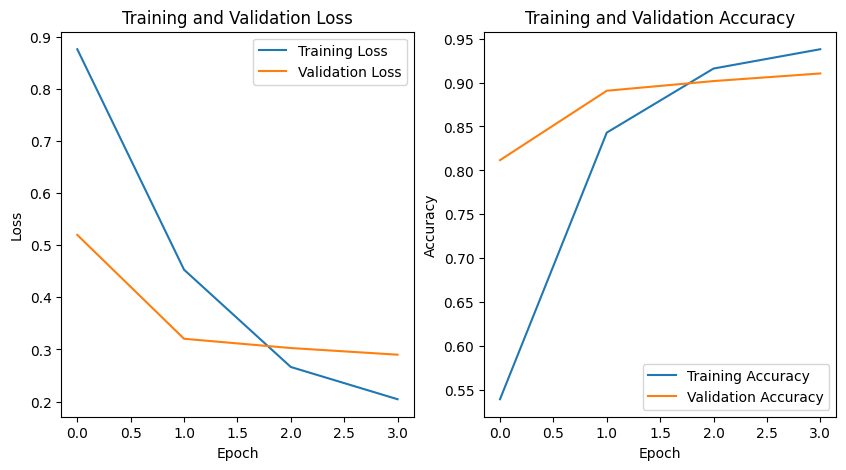

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()